In [1]:
from project_test_mehmet import colorization
result = colorization(learning_rate=0.0001, n_epochs=1,
                    verbose=True,batch_size=5,ds_rate=1,dim_in=256/1)

(581, 65536)
Current training data size is 581
Current validation data size is 581
Current test data size is 581
... building the model


WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named mkl


... training
('training @ iter = ', 0)
epoch 1, minibatch 1/116, validation error 1318.760485 %
Optimization complete.


In [7]:
orig_y = result[1].reshape(5,2,256,256)
orig_y.shape

(5, 2, 256, 256)

In [ ]:
import numpy as np
import theano.tensor as T
T.config.floatX = 'float32'
dataPoints = np.random.random((64+64, 256 * 256)).astype(T.config.floatX)
#float32 data type requires 4 bytes
sizeinGBs = 64 * 256 * 256 * 4 / 1024. / 1024 / 1024 
print "Data will need %2f GBs of free memory" % sizeinGBs

In [62]:
import numpy as np
from project_test_mehmet import load_data
from project_util import encode_ab_to_Q 
import os
from PIL import Image
from resizeimage import resizeimage
from matplotlib import pyplot as plt
from skimage import color

%matplotlib inline

with open('/Users/monsiper/Desktop/deep learning/colorization/data/raw/' +  '1AKL15pxyyVrHKMVR8Md64sAJw9.jpg', 'r+b') as f:
    with Image.open(f) as img_f:
        resized_im = resizeimage.resize_cover(img_f, [256, 256])

img_rgb = (np.array(resized_im))
img_lab = color.rgb2lab(img_rgb[:,:,0:3])
l = img_lab[:, :, 0].flatten() # Slicing to get L data
a = (img_lab[:, :, 1][::4,::4]).flatten()  # Slicing to get a data
b = (img_lab[:, :, 2][::4,::4]).flatten()
l_out = np.array(l, np.float32)
ab_enc_out = encode_ab_to_Q(a,b)
ref_Qcolor_bins = np.load('/Users/monsiper/Desktop/deep learning/colorization/pts_in_hull.npy')
data_ab = np.dot(ab_enc_out.reshape(4096,313), ref_Qcolor_bins)
data_a_chan = (data_ab[:,0]).reshape(1,64,64)
data_b_chan = (data_ab[:,1]).reshape(1,64,64)
img_construct = np.concatenate((data_a_chan, data_b_chan), axis=0)
img_construct = np.concatenate(((l_out.reshape(1,256,256)[:,::4,::4]), img_construct), axis=0)



# l_ds = img_lab[:, :, 0][::4,::4] 
# img_cons = np.concatenate((a.reshape(1,64,64),b.reshape(1,64,64)), axis=0) 
# img_cons = np.concatenate((l_ds.reshape(1,64,64), img_cons),axis=0)
# plt.imshow(color.lab2rgb(img_cons.transpose(1,2,0)))
# distances, indices, wts = encode_ab_to_Q(data_a_chan, data_b_chan)

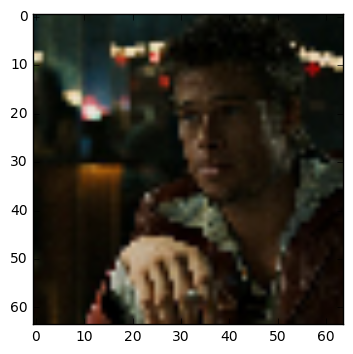

In [63]:
plt.imshow(color.lab2rgb(img_cons.transpose(1,2,0)))

In [19]:
img_enc = np.zeros((64*64, 313 ))
x_ind =np.arange(0,4096,dtype='int')[:,np.newaxis]
img_enc[x_ind, indices] = wts
img_flt = img_enc.flatten()
print img_flt.reshape(4096,313)[0]

(5,) (5,)
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.  

In [ ]:
import urllib2
from bs4 import BeautifulSoup
import os, sys
from PIL import Image
from resizeimage import resizeimage
import numpy as np
from matplotlib import pyplot as plt
from skimage import color, io
import theano
%matplotlib inline

data_l = ((result[0][3]).reshape(1,256,256)).transpose(1,2,0)
data_ab_y = ((result[1][3]).reshape(2,256,256)).transpose(1,2,0)
data_ab_nn = ((result[2][3]).reshape(2,256,256)).transpose(1,2,0)
img_construct = np.concatenate((data_l.astype(np.float64),data_ab_nn.astype(np.float64)), axis=2)
plt.imshow(color.lab2rgb(img_construct))
plt.show()

In [ ]:
rng = numpy.random.RandomState(23455)
    
new_path = './data/'
if not os.path.isdir(new_path):
    download_images(dir_name, 3)
    prepare_image_sets(dir_name, batch_size=200)
#train_set, valid_set, test_set = 
train_set = load_data(dir_name,theano_shared=False)